In [13]:
from sgdp import SGDplus
from sgd_mn import SGDPlusMultiNeuron
from ADAM_on import myADAM

import matplotlib.pyplot as plt

lr = 5*1e-3

sgd_on = SGDplus(
               one_neuron_model = True,
               expressions = ['xw=ab*xa+bc*xb+cd*xc+ac*xd'],
               output_vars = ['xw'],
               dataset_size = 5000,
               learning_rate = lr,
#               learning_rate = 5 * 1e-2,
               training_iterations = 40000,
               batch_size = 8,
               display_loss_how_often = 100,
               debug = True,
      )


sgd_on.parse_expressions()
training_data = sgd_on.gen_training_data()

sgd_on_loss_0 = sgd_on.train_one_neuron(training_data)
sgd_on_loss_5 = sgd_on.train_one_neuron(training_data, mu=0.5)
sgd_on_loss_9 = sgd_on.train_one_neuron(training_data, mu=0.9)



all variables: {'xw', 'xa', 'xd', 'xb', 'xc'}


learnable params: ['ab', 'bc', 'cd', 'ac']


dependencies: {'xw': ['xa', 'xb', 'xc', 'xd']}


expressions dict: {'xw': 'ab*xa+bc*xb+cd*xc+ac*xd'}


var_to_var_param dict:  {'xw': {'xa': 'ab', 'xb': 'bc', 'xc': 'cd', 'xd': 'ac'}}


node to int labels:  {'xa': 0, 'xb': 1, 'xc': 2, 'xd': 3, 'xw': 4}


independent vars: ['xa', 'xd', 'xb', 'xc']


leads_to dictionary: {'xw': set(), 'xa': {'xw'}, 'xd': {'xw'}, 'xb': {'xw'}, 'xc': {'xw'}}


In [14]:
sgd_mn = SGDPlusMultiNeuron(
               num_layers = 3,
               layers_config = [4,2,1],                         # num of nodes in each layer
               expressions = ['xw=ap*xp+aq*xq+ar*xr+as*xs',
                              'xz=bp*xp+bq*xq+br*xr+bs*xs',
                              'xo=cp*xw+cq*xz'],
               output_vars = ['xo'],
               dataset_size = 5000,
               learning_rate = lr,
#               learning_rate = 5 * 1e-2,
               training_iterations = 40000,
               batch_size = 8,
               display_loss_how_often = 100,
               debug = True,
      )

sgd_mn.parse_multi_layer_expressions()


sgd_mn_loss_0 = sgd_mn.train_multineuron(training_data)
sgd_mn_loss_5 = sgd_mn.train_multineuron(training_data, mu=0.5)
sgd_mn_loss_9 = sgd_mn.train_multineuron(training_data, mu=0.9)



self.layer_expressions:  {1: ['xw=ap*xp+aq*xq+ar*xr+as*xs', 'xz=bp*xp+bq*xq+br*xr+bs*xs'], 2: ['xo=cp*xw+cq*xz']}


[layer index: 1] all variables: {'xw', 'xs', 'xp', 'xz', 'xq', 'xr'}


[layer index: 1] learnable params: {'bs', 'as', 'bq', 'br', 'ar', 'aq', 'bp', 'ap'}


[layer index: 1] dependencies: {'xw': ['xp', 'xq', 'xr', 'xs'], 'xz': ['xp', 'xq', 'xr', 'xs']}


[layer index: 1] expressions dict: {'xw': 'ap*xp+aq*xq+ar*xr+as*xs', 'xz': 'bp*xp+bq*xq+br*xr+bs*xs'}


[layer index: 1] var_to_var_param dict: {'xw': {'xp': 'ap', 'xq': 'aq', 'xr': 'ar', 'xs': 'as'}, 'xz': {'xp': 'bp', 'xq': 'bq', 'xr': 'br', 'xs': 'bs'}}


[layer index: 1] node to int labels: {'xp': 0, 'xq': 1, 'xr': 2, 'xs': 3, 'xw': 4, 'xz': 5}


[layer index: 1] independent vars: {'xr', 'xp', 'xs', 'xq'}


[layer index: 1] leads_to dictionary: {'xw': set(), 'xs': {'xw', 'xz'}, 'xp': {'xw', 'xz'}, 'xz': set(), 'xq': {'xw', 'xz'}, 'xr': {'xw', 'xz'}}


[layer index: 2] all variables: {'xw', 'xo', 'xs', 'xp', 'xz', 'x

100%|██████████| 40000/40000 [01:31<00:00, 436.00it/s]


In [15]:
adam_on = myADAM(
               one_neuron_model = True,
               expressions = ['xw=ab*xa+bc*xb+cd*xc+ac*xd'],
               output_vars = ['xw'],
               dataset_size = 5000,
               learning_rate = lr,
#               learning_rate = 5 * 1e-2,
               training_iterations = 40000,
               batch_size = 8,
               display_loss_how_often = 100,
               debug = True,
      )


adam_on.parse_expressions()
# training_data = cgp.gen_training_data()

# loss_0 = cgp.train(training_data)
loss = adam_on.train(training_data)
# plt.plot(loss)

# loss_9 = cgp.train(training_data, mu=0.9)
# plt.plot(loss_0)
# plt.plot(loss_9)




all variables: {'xw', 'xa', 'xd', 'xb', 'xc'}


learnable params: ['ab', 'bc', 'cd', 'ac']


dependencies: {'xw': ['xa', 'xb', 'xc', 'xd']}


expressions dict: {'xw': 'ab*xa+bc*xb+cd*xc+ac*xd'}


var_to_var_param dict:  {'xw': {'xa': 'ab', 'xb': 'bc', 'xc': 'cd', 'xd': 'ac'}}


node to int labels:  {'xa': 0, 'xb': 1, 'xc': 2, 'xd': 3, 'xw': 4}


independent vars: ['xa', 'xd', 'xb', 'xc']


leads_to dictionary: {'xw': set(), 'xa': {'xw'}, 'xd': {'xw'}, 'xb': {'xw'}, 'xc': {'xw'}}


In [16]:
from ADAM_multi import myADAMMultiNeuron
adam_mn = myADAMMultiNeuron(
               num_layers = 3,
               layers_config = [4,2,1],                         # num of nodes in each layer
               expressions = ['xw=ap*xp+aq*xq+ar*xr+as*xs',
                              'xz=bp*xp+bq*xq+br*xr+bs*xs',
                              'xo=cp*xw+cq*xz'],
               output_vars = ['xo'],
               dataset_size = 5000,
               learning_rate = lr,
#               learning_rate = 5 * 1e-2,
               training_iterations = 40000,
               batch_size = 8,
               display_loss_how_often = 100,
               debug = True,
      )

adam_mn.parse_multi_layer_expressions()

training_data = adam_mn.gen_training_data()
adam_mn_loss = adam_mn.train_multineuron(training_data)



self.layer_expressions:  {1: ['xw=ap*xp+aq*xq+ar*xr+as*xs', 'xz=bp*xp+bq*xq+br*xr+bs*xs'], 2: ['xo=cp*xw+cq*xz']}


[layer index: 1] all variables: {'xw', 'xs', 'xp', 'xz', 'xq', 'xr'}


[layer index: 1] learnable params: {'bs', 'as', 'bq', 'br', 'ar', 'aq', 'bp', 'ap'}


[layer index: 1] dependencies: {'xw': ['xp', 'xq', 'xr', 'xs'], 'xz': ['xp', 'xq', 'xr', 'xs']}


[layer index: 1] expressions dict: {'xw': 'ap*xp+aq*xq+ar*xr+as*xs', 'xz': 'bp*xp+bq*xq+br*xr+bs*xs'}


[layer index: 1] var_to_var_param dict: {'xw': {'xp': 'ap', 'xq': 'aq', 'xr': 'ar', 'xs': 'as'}, 'xz': {'xp': 'bp', 'xq': 'bq', 'xr': 'br', 'xs': 'bs'}}


[layer index: 1] node to int labels: {'xp': 0, 'xq': 1, 'xr': 2, 'xs': 3, 'xw': 4, 'xz': 5}


[layer index: 1] independent vars: {'xr', 'xp', 'xs', 'xq'}


[layer index: 1] leads_to dictionary: {'xw': set(), 'xs': {'xw', 'xz'}, 'xp': {'xw', 'xz'}, 'xz': set(), 'xq': {'xw', 'xz'}, 'xr': {'xw', 'xz'}}


[layer index: 2] all variables: {'xw', 'xo', 'xs', 'xp', 'xz', 'x

100%|██████████| 40000/40000 [01:52<00:00, 355.26it/s]


ValueError: Format '005' is not supported (supported formats: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff, webp)

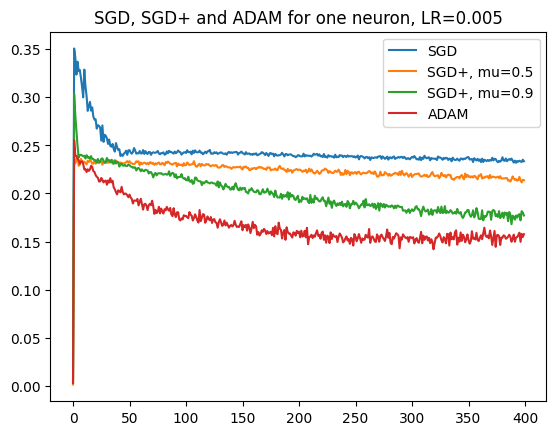

In [17]:
import matplotlib.pyplot as plt


plt.plot(sgd_on_loss_0, label='SGD')
plt.plot(sgd_on_loss_5, label='SGD+, mu=0.5')
plt.plot(sgd_on_loss_9, label='SGD+, mu=0.9')
plt.plot(loss, label='ADAM')
plt.legend()
plt.title(f'SGD, SGD+ and ADAM for one neuron, LR={lr}')
plt.savefig(f"one_neuron_{lr}")

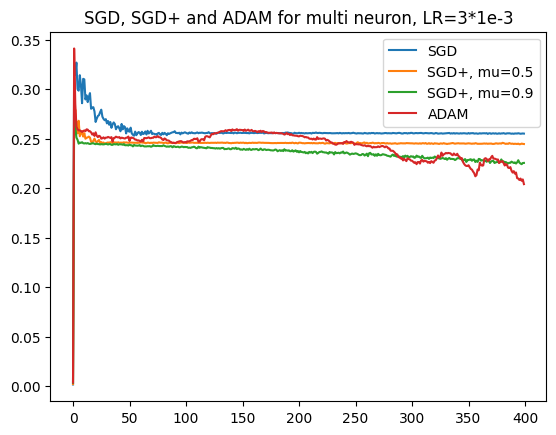

In [ ]:
plt.plot(sgd_mn_loss_0, label='SGD')
plt.plot(sgd_mn_loss_5, label='SGD+, mu=0.5')
plt.plot(sgd_mn_loss_9, label='SGD+, mu=0.9')
plt.plot(adam_mn_loss, label='ADAM')
plt.legend()
plt.title(f'SGD, SGD+ and ADAM for multi neuron, LR={lr}')
plt.savefig(f"multi_neuron_{lr}")